In [130]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)
pd.set_option('display.max_columns', None)

In [131]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling.csv')
df.rename(columns={'DateoFdeath': 'dateOfDeath'}, inplace=True)

In [132]:
pd.set_option('display.max_rows', None)

d = df['title'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

                                                 Value  Number of observations
0                                                  Ser                     272
1                                              Maester                      30
2                                           Winterfell                      15
3                                          Archmaester                      14
4                                             Princess                      14
5                                                 Lord                      12
6                                               Septon                      10
7                                        Grand Maester                       8
8                                                 Lady                       8
9                  Lord Commander of the Night's Watch                       7
10                                           Cupbearer                       7
11                                              Prin

In [133]:
df['title'] = df['title'].fillna('no title')

df['category'] = df['title'].apply(lambda x: 'lord' if 'lord' in x.lower() else ('lady' if 'lady' in x.lower() else ''))

filtered_df = df[df['category'].isin(['lord', 'lady'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

  Value  Number of observations
0  lord                      61
1  lady                      16


In [134]:
df['title'] = df['title'].fillna('no title')

df['category'] = df['title'].apply(lambda x: 'prince' if 'prince' in x.lower() else ('prince' if 'princess' in x.lower() else ''))

filtered_df = df[df['category'].isin(['prince', 'princess'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

    Value  Number of observations
0  prince                      32


In [135]:
df['category'] = df['title'].apply(lambda x: 'master' if 'master' in x.lower() else '')

filtered_df = df[df['category'].isin(['master'])]

d = filtered_df['category'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

    Value  Number of observations
0  master                       9


In [136]:
df['title'] = df['title'].fillna('no title')
df['title'] = df['title'].apply(lambda x: 'Lord' if 'lord' in x.lower() else ('Lady' if 'lady' in x.lower() else x))
df['title'] = df['title'].apply(lambda x: 'Prince' if 'prince' in x.lower() else x)
df['title'] = df['title'].apply(lambda x: 'Master' if 'master' in x.lower() else x)

In [137]:
pd.set_option('display.max_rows', None)

d = df['title'].value_counts().reset_index()
d.columns = ['Value', 'Number of observations']

print(d)

                               Value  Number of observations
0                           no title                     703
1                                Ser                     272
2                               Lord                      61
3                             Prince                      32
4                            Maester                      30
5                               Lady                      16
6                         Winterfell                      15
7                        Archmaester                      14
8                             Septon                      10
9                             Master                       9
10                     Grand Maester                       8
11                         Cupbearer                       7
12                            Knight                       4
13                             Septa                       4
14                             Eyrie                       4
15                     C

In [138]:
df.drop(columns=['father', 'mother', 'spouse', 'heir', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

In [139]:
only_birth_count = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].isnull()].shape[0]
only_death_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].notnull() & df['age'].isnull()].shape[0]
only_age_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].isnull() & df['age'].notnull()].shape[0]
all_missing_count = df[df[['dateOfBirth', 'dateOfDeath', 'age']].isnull().all(axis=1)].shape[0]
death_age_count = df[df['dateOfBirth'].isnull() & df['dateOfDeath'].notnull() & df['age'].notnull()].shape[0]
death_birth_count = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].notnull() & df['age'].isnull()].shape[0]
alive = df[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].notnull() & df['isAlive'] == 1].shape[0]


print("Number of characters with only date of birth:", only_birth_count)
print("Number of characters with only date of death:", only_death_count)
print("Number of characters with only age:", only_age_count)
print("Number of characters with age and date of death", death_age_count)
print("Number of characters with date of birth and date of death", death_birth_count)
print("Number of characters with all three values missing:", all_missing_count)
print("Number of characters still alive that don't have date of death:", alive)


Number of characters with only date of birth: 0
Number of characters with only date of death: 218
Number of characters with only age: 0
Number of characters with age and date of death 0
Number of characters with date of birth and date of death 0
Number of characters with all three values missing: 829
Number of characters still alive that don't have date of death: 205


In [140]:
df.loc[df['dateOfBirth'].notnull() & df['dateOfDeath'].isnull() & df['age'].notnull() & (df['isAlive'] == 1), 'dateOfDeath'] = 0

In [141]:
# Count negative values in dateOfBirth column
negative_dateOfBirth = (df['dateOfBirth'] < 0).sum()

# Count negative values in dateOfDeath column
negative_dateOfDeath = (df['dateOfDeath'] < 0).sum()

# Count negative values in age column
negative_age = (df['age'] < 0).sum()

print("Number of negative values in dateOfBirth:", negative_dateOfBirth)
print("Number of negative values in dateOfDeath:", negative_dateOfDeath)
print("Number of negative values in age:", negative_age)


Number of negative values in dateOfBirth: 2
Number of negative values in dateOfDeath: 0
Number of negative values in age: 0


In [142]:
print(df[df['dateOfBirth'] < 0])

                   name               title  male   culture  dateOfBirth  \
739   Visenya Targaryen  QueenDowager Queen     0  Valyrian        -28.0   
1347  Rhaenys Targaryen               Queen     0  Valyrian        -25.0   

      dateOfDeath            house  book1  book2  book3  book4  book5  \
739          44.0  House Targaryen      1      1      1      1      1   
1347         10.0  House Targaryen      1      0      0      0      0   

      isMarried  isNoble   age  numDeadRelations  boolDeadRelations  \
739           1        1  72.0                 5                  1   
1347          1        1  35.0                 1                  1   

      isPopular  popularity  isAlive category  
739           0    0.277592        0           
1347          0    0.277592        0           


In [143]:
birth_min = df['dateOfBirth'].min()
birth_max = df['dateOfBirth'].max()

# Define the observed range for age
age_min = 10
age_max = 100

def fill_missing_values(row):
    if row['isAlive'] == 0:
        # Generate random birth year and age
        row['dateOfBirth'] = np.random.randint(0, 100)
        row['age'] = np.random.randint(age_min, age_max)
        # Calculate death year
        row['dateOfDeath'] = row['dateOfBirth'] + row['age']
    else:
        # Generate random age for alive individuals
        row['age'] = np.random.randint(age_min, age_max)
        # Calculate birth year
        row['dateOfBirth'] = birth_max - row['age']
        row['dateOfDeath'] = 0  # Ensure dateOfDeath remains null for alive characters
    return row

# Apply the function to the DataFrame
df = df.apply(fill_missing_values, axis=1)

# Apply the function to the DataFrame
df = df.apply(fill_missing_values, axis=1)


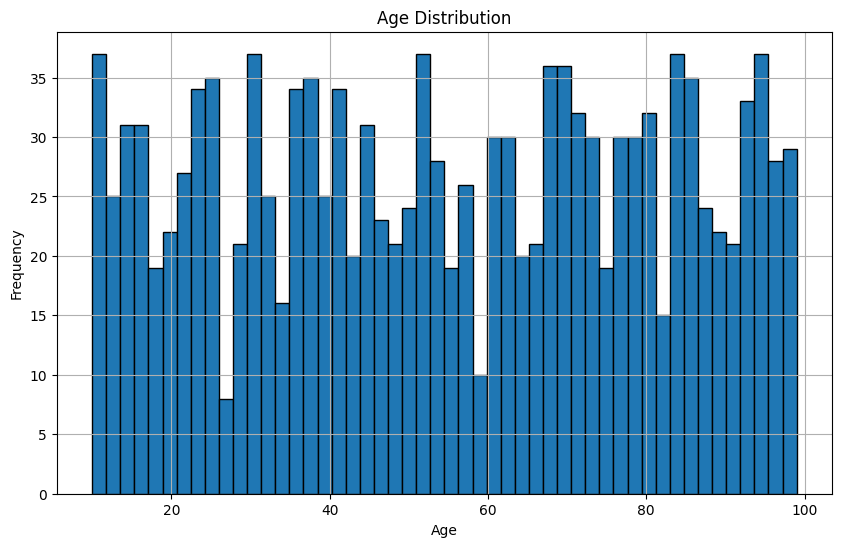

In [144]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=50, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [146]:
df.to_csv('../Data/Modeling/character-predictions-modeling.csv', index=False)